# Introduction
The task of the assignment 3 is the design of a CNN architecture and its training.

*Input dataset:* **MNIST digits** (input size: 28x28x1, number of classes: 10).

The CNN has to be designed with the aim of reaching the maximum possible accuracy on the test set, with the hard constraint of a maximum of 7K learnable parameters.

# Setup

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

# Data preparation

In [2]:
# data parameters
num_classes = 10
input_shape = (28, 28, 1)

# load the data and divide it into train/test split
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# scale images into the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# make images with size (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [3]:
print("x_train shape: ", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Models definition

## Baseline model (34.826 parameters)
As seen in class.

In [5]:
model = keras.Sequential(
    [
     keras.Input(shape = input_shape),
     layers.Conv2D(32, kernel_size = (3, 3), activation = "relu"),
     layers.MaxPooling2D(pool_size = (2, 2)),
     layers.Conv2D(64, kernel_size = (3, 3), activation = "relu"),
     layers.MaxPooling2D(pool_size = (2, 2)), 
     layers.Flatten(),
     layers.Dropout(0.3),
     layers.Dense(units = num_classes, activation = "softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

The *summary()* function allows us to see the parameters count for each layer.

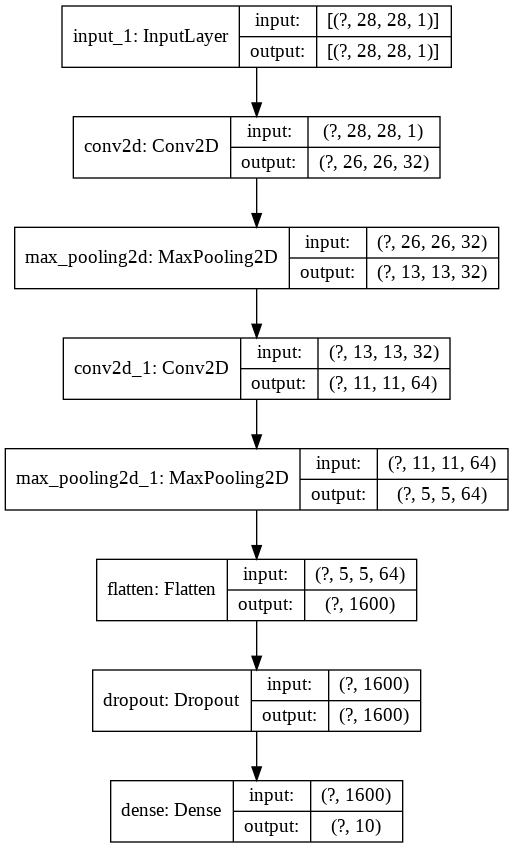

In [6]:
plot_model(model, show_shapes = True, show_layer_names = True)

Instead, the *plot_model()* function allows us to see the designed architecture.


## First smaller model (5.258 parameters)
I simply reduced the number of filters wrt the baseline model.

In [7]:
model_1 = keras.Sequential(
    [
     keras.Input(shape = input_shape),
     layers.Conv2D(8, kernel_size = (3, 3), activation = "relu"),
     layers.MaxPooling2D(pool_size = (2, 2)),
     layers.Conv2D(16, kernel_size = (3, 3), activation = "relu"),
     layers.MaxPooling2D(pool_size = (2, 2)), 
     layers.Flatten(),
     layers.Dropout(0.3),
     layers.Dense(units = num_classes, activation = "softmax"),
    ]
)

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

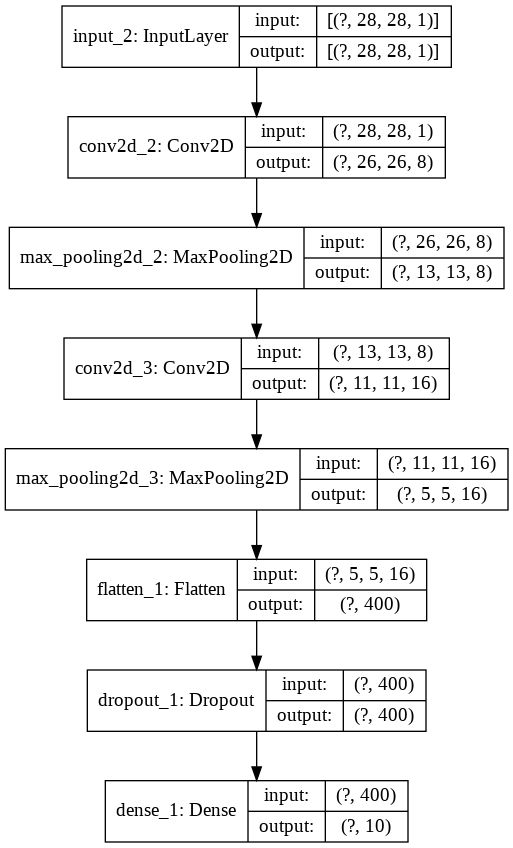

In [8]:
plot_model(model_1, show_shapes = True, show_layer_names = True)

## Second smaller model (666 parameters)
I've drastically reduced the number of filters wrt the baseline model and I've increased the *pool_size*.

In [9]:
model_2 = keras.Sequential(
    [
     keras.Input(shape = input_shape),
     layers.Conv2D(4, kernel_size = (3, 3), activation = "relu"),
     layers.MaxPooling2D(pool_size = (3, 3)),
     layers.Conv2D(8, kernel_size = (3, 3), activation = "relu"),
     layers.MaxPooling2D(pool_size = (3, 3)), 
     layers.Flatten(),
     layers.Dropout(0.3),
     layers.Dense(units = num_classes, activation = "softmax"),
    ]
)

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 4)         40        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 4)           0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 8)           296       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 8)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

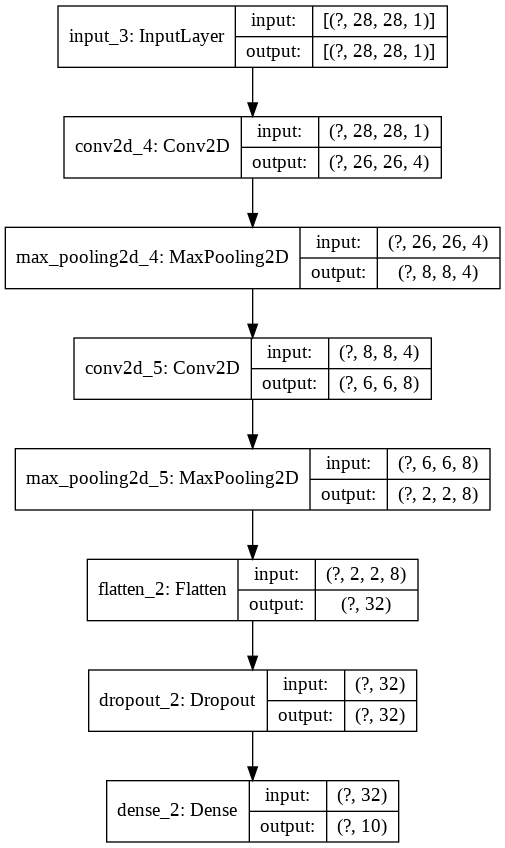

In [10]:
plot_model(model_2, show_shapes = True, show_layer_names = True)

# Models training!

In [11]:
# models parameters
batch_size = 64
epochs = 15

I set the *batch_size* to 64, while I left the other as default in light of the results achieved.

In [12]:
# baseline model
model.compile(loss = "categorical_crossentropy", optimizer = "adam", 
              metrics = ["accuracy"])

history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                    validation_split = 0.1)

Epoch 1/15
844/844 [==============================] - 3s 4ms/step - loss: 0.2444 - accuracy: 0.9269 - val_loss: 0.0655 - val_accuracy: 0.9817
Epoch 2/15
844/844 [==============================] - 3s 3ms/step - loss: 0.0786 - accuracy: 0.9758 - val_loss: 0.0489 - val_accuracy: 0.9853
Epoch 3/15
844/844 [==============================] - 3s 3ms/step - loss: 0.0608 - accuracy: 0.9815 - val_loss: 0.0461 - val_accuracy: 0.9873
Epoch 4/15
844/844 [==============================] - 3s 3ms/step - loss: 0.0494 - accuracy: 0.9843 - val_loss: 0.0432 - val_accuracy: 0.9883
Epoch 5/15
844/844 [==============================] - 3s 3ms/step - loss: 0.0432 - accuracy: 0.9866 - val_loss: 0.0443 - val_accuracy: 0.9877
Epoch 6/15
844/844 [==============================] - 3s 3ms/step - loss: 0.0383 - accuracy: 0.9880 - val_loss: 0.0342 - val_accuracy: 0.9912
Epoch 7/15
844/844 [==============================] - 3s 3ms/step - loss: 0.0336 - accuracy: 0.9889 - val_loss: 0.0355 - val_accuracy: 0.9892
Epoch 

In [13]:
# first smaller model
model_1.compile(loss = "categorical_crossentropy", optimizer = "adam", 
                metrics = ["accuracy"])

history_1 = model_1.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                        validation_split = 0.1)

Epoch 1/15
844/844 [==============================] - 3s 3ms/step - loss: 0.4442 - accuracy: 0.8630 - val_loss: 0.1104 - val_accuracy: 0.9688
Epoch 2/15
844/844 [==============================] - 3s 3ms/step - loss: 0.1541 - accuracy: 0.9535 - val_loss: 0.0791 - val_accuracy: 0.9785
Epoch 3/15
844/844 [==============================] - 3s 3ms/step - loss: 0.1176 - accuracy: 0.9643 - val_loss: 0.0624 - val_accuracy: 0.9835
Epoch 4/15
844/844 [==============================] - 3s 3ms/step - loss: 0.1020 - accuracy: 0.9689 - val_loss: 0.0537 - val_accuracy: 0.9862
Epoch 5/15
844/844 [==============================] - 3s 3ms/step - loss: 0.0894 - accuracy: 0.9728 - val_loss: 0.0503 - val_accuracy: 0.9867
Epoch 6/15
844/844 [==============================] - 3s 4ms/step - loss: 0.0856 - accuracy: 0.9737 - val_loss: 0.0469 - val_accuracy: 0.9872
Epoch 7/15
844/844 [==============================] - 3s 4ms/step - loss: 0.0788 - accuracy: 0.9754 - val_loss: 0.0426 - val_accuracy: 0.9892
Epoch 

In [14]:
# second smaller model
model_2.compile(loss = "categorical_crossentropy", optimizer = "adam", 
                metrics = ["accuracy"])

history_2 = model_2.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                        validation_split = 0.1)

Epoch 1/15
844/844 [==============================] - 3s 3ms/step - loss: 1.5713 - accuracy: 0.4581 - val_loss: 0.6265 - val_accuracy: 0.8557
Epoch 2/15
844/844 [==============================] - 3s 3ms/step - loss: 0.8590 - accuracy: 0.7178 - val_loss: 0.4256 - val_accuracy: 0.8943
Epoch 3/15
844/844 [==============================] - 3s 3ms/step - loss: 0.7209 - accuracy: 0.7653 - val_loss: 0.3570 - val_accuracy: 0.9093
Epoch 4/15
844/844 [==============================] - 2s 3ms/step - loss: 0.6560 - accuracy: 0.7845 - val_loss: 0.3284 - val_accuracy: 0.9178
Epoch 5/15
844/844 [==============================] - 3s 3ms/step - loss: 0.6232 - accuracy: 0.7940 - val_loss: 0.2991 - val_accuracy: 0.9223
Epoch 6/15
844/844 [==============================] - 3s 3ms/step - loss: 0.6121 - accuracy: 0.7982 - val_loss: 0.2984 - val_accuracy: 0.9247
Epoch 7/15
844/844 [==============================] - 2s 3ms/step - loss: 0.5889 - accuracy: 0.8057 - val_loss: 0.2792 - val_accuracy: 0.9280
Epoch 

# Plot the model on the training set

In [15]:
# function definition
x_plot = list(range(1, epochs + 1))
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['accuracy'])
    plt.plot(x_plot, network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc = 'lower right')
    plt.show()

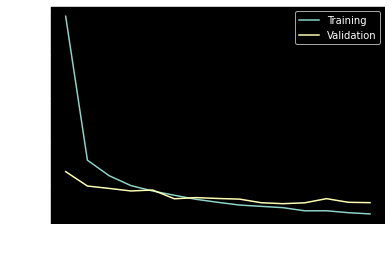

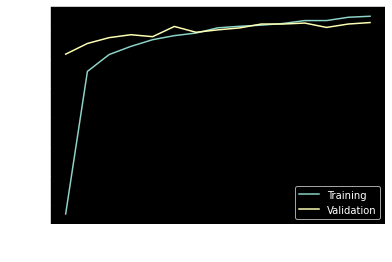

In [16]:
# baseline model
plot_history(history)

We can notice a bit of overfitting, since the curves touch each other and the accuracy on the validation set is less than that of training set.

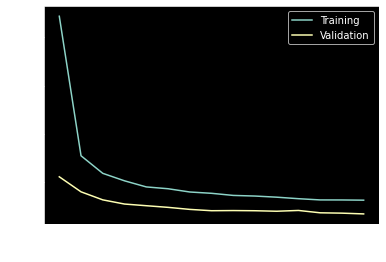

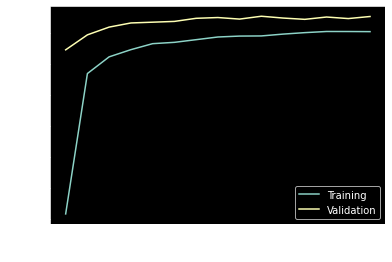

In [17]:
# first smaller model
plot_history(history_1)

We obtained results very similar to the previous case, but the curves do not touch each other.

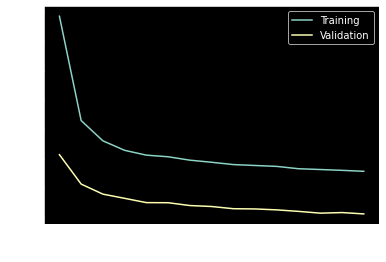

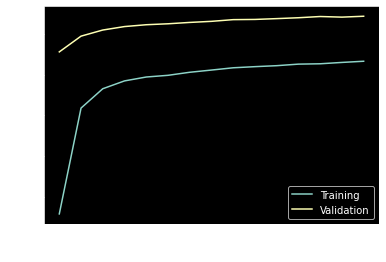

In [18]:
# seccond smaller model
plot_history(history_2)

We can see that the gap between training and validation is larger.
On the other hand, the loss initially is higher while the accuracy is lower.

# Evaluate the model on the test set

In [19]:
# baseline model
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02762870118021965
Test accuracy: 0.9916999936103821


In [20]:
# first smaller model
score_1 = model_1.evaluate(x_test, y_test, verbose = 0)
print("Test loss:", score_1[0])
print("Test accuracy:", score_1[1])

Test loss: 0.03858530521392822
Test accuracy: 0.9871000051498413


In [21]:
# second smaller model
score_2 = model_2.evaluate(x_test, y_test, verbose = 0)
print("Test loss:", score_2[0])
print("Test accuracy:", score_2[1])

Test loss: 0.23568905889987946
Test accuracy: 0.9373999834060669


Text(0, 0.5, 'Loss')

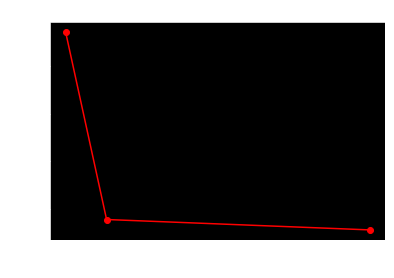

In [22]:
# loss comparison
plt.plot([model.count_params(), model_1.count_params(), model_2.count_params()],
         [score[0], score_1[0], score_2[0]],
         '-ro')
plt.title("Models Comparison (Loss)")
plt.xlabel("# Parameters")
plt.ylabel("Loss")

Increasing the number of parameters, decreases the loss.

Text(0, 0.5, 'Accuracy')

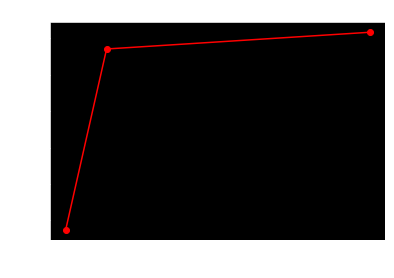

In [23]:
# accuracy comparison
plt.plot([model.count_params(), model_1.count_params(), model_2.count_params()],
         [score[1], score_1[1], score_2[1]],
         '-ro')
plt.title("Models Comparison (Accuracy)")
plt.xlabel("# Parameters")
plt.ylabel("Accuracy")

Increasing the number of parameters, also increases the accuracy.

# Conclusions 

As seen in class, the motivation to compress models has grown and expanded in recent years from being predominantly focused around deployment on mobile devices (see, for example, [TensorFlow Lite](https://www.tensorflow.org/lite)), to also learning smaller networks on the same device but with eased hardware constraints.

In our case, we have seen how a model with less than 7K parameters has achieved similar performance to the baseline model with about 34K parameters. In fact, a decrease of 85% in the number of parameters leads to a decrease in accuracy of only 0,5% wrt the test set. 

Furthermore, the analysis of a model with less than 1K parameters has shown good results, even if more distant. It is therefore necessary to find a *trade-off* between the number of parameters and the required results.